# **Tutorial 7: Assessing Climate Forcings**
**Week 1, Day 4, Paleoclimate**

**Content creators:** Sloane Garelick

**Content reviewers:** Brodie Pearson

**Content editors:** Mauro Tripaldi, Agustina Pesce, Zahra Khodakaramimaghsoud

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

###**Code and Data Sources**

Code for this tutorial is based on an existing notebook from LinkedEarth that explore [forcing and responses in paleoclimate data](https://github.com/LinkedEarth/paleoHackathon/blob/main/notebooks/PaleoHack-nb04_Forcing%26Response.ipynb).

Data from the following sources are used in this tutorial:

*   Cheng, H., Edwards, R., Sinha, A. et al. The Asian monsoon over the past 640,000 years and ice age terminations. Nature 534, 640–646 (2016). https://doi.org/10.1038/nature18591

















#**Tutorial 7 Objectives**

In this tutorial, you will use some data analysis tool and climate concepts that we've learned so far today and on previous days to assess the forcings of climate variations observed in paleoclimate records. 


By the end of this tutorial you will be able to:

*   Plot and interpret temperature reconstructions from speleothem oxygen isotopes
*   Generate and plot time series of solar insolation
*   Assess the orbital forcings on monsoon intensity over the past 400,000 years using spectral analysis




In [ ]:
# Install libraries
!pip install pandas
!pip install numpy
!pip install pooch
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
!pip install pyleoclim
!pip install climlab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.6 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113645 sha256=426f02ffc1e2f0e1edc9e3fdf0ade15d8fd34cfc56d9e7fe1f07cd056975eba1
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     

In [ ]:
# Import libraries
import pooch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cartopy.crs
import pyleoclim as pyleo

from climlab import constants as const
from climlab.solar.orbital import OrbitalTable
from climlab.solar.insolation import daily_insolation

/usr/local/lib/python3.9/dist-packages/climlab/radiation/cam3.py:46: UserWarning: Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, CAM3 module will not be functional.')
/usr/local/lib/python3.9/dist-packages/climlab/radiation/rrtm/rrtmg_lw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_LW module will not be functional.')
/usr/local/lib/python3.9/dist-packages/climlab/radiation/rrtm/rrtmg_sw.py:19: UserWarning: Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.
  warnings.warn('Cannot import and initialize compiled Fortran extension, RRTMG_SW module will not be functional.')
/usr/local/lib/python3.9/dist-packages/climlab/convection/emanuel_convection.py:14: UserWarning: Cannot i

Tokenization took: 3.95 ms
Type conversion took: 1.96 ms
Parser memory cleanup took: 0.01 ms


## Understanding climate forcings

A common task in paleoclimatology is to relate a proxy record (or several of them) to the particular forcing(s) that is thought to dominate that particular record (e.g., based on the proxy, location etc.). For example, δ18O records from speleothems in Chinese caves are broadly interpreted to reflect continental-scale monsoon circulations. In this notebook we'll plot and analyze a composite of three Chinese speleothem records (Sanbao, Hulu, and Dongge caves) from [Cheng et al. (2016)](https://hwww.nature.com/articles/nature18591) and the relationship between this climate signal to solar insolation.

First, we can download and plot the speleothem oxygen isotope data:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [kyr BP]', ylabel='$\\delta^{18}$O [‰]'>)

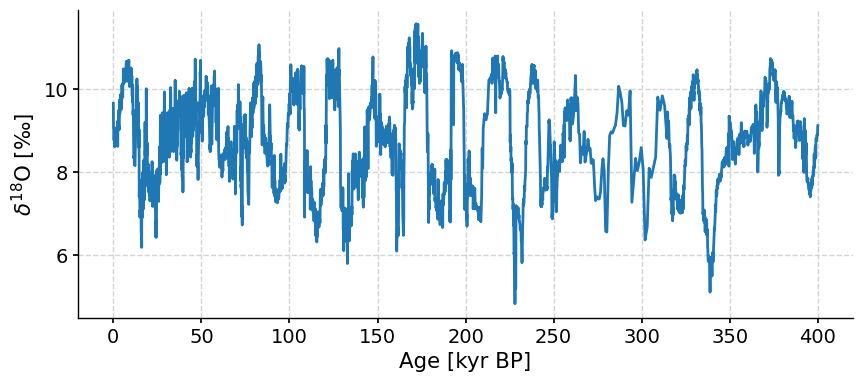

In [ ]:
# Download the data from the url
data_path = pooch.retrieve(
    'https://raw.githubusercontent.com/LinkedEarth/paleoHackathon/main/data/Orbital_records/Sanbao_composite.csv',
    known_hash=None
)
data = pd.read_csv(data_path)

# Create a pyleo.Series
d18O_data = pyleo.Series(
    time=data['age']/1000,
    time_name='Age',
    time_unit='kyr BP',
    value=-data['d18O'],
    value_name=r'$\delta^{18}$O',
    value_unit=u'\u2030'
)
d18O_data.plot()

You may notice that in the figure we just made, the d18O values on the y-axis is plotted with more positive values up, whereas in previous tutorials, we've plotted isotopic data with more negative values up (since more negative/"depleted" suggests warmer temperatures or increased rainfall). However, the pre-processed d18O data that we're using in this tutorial was multipled by -1, so now a more positive/"enriched" value suggests warmer temepratures or increased rainfall. In other words, in this figure, upward on the y-axis is increased monsoon intensity and downward on the y-axis is decreased monsoon intensity.

Let's apply what we learned in the previous tutorial to perform spectral analysis on the speleothem oxygen isotope data. Recall from the previous tutorial that spectral analysis can help us identify dominant cyclicities in the data, which can be useful for assessing potential climate forcings.

We'll use the Weighted Wavelet Z-Transform (WWZ) method:

In [ ]:
#Standardize the data 
d18O_stnd = d18O_data.interp(step=0.5).standardize() # save it for future use

In [ ]:
#Calculate the WWZ spectral analysis
d18O_wwz = d18O_stnd.spectral(method='wwz')

(0.001, 1000)

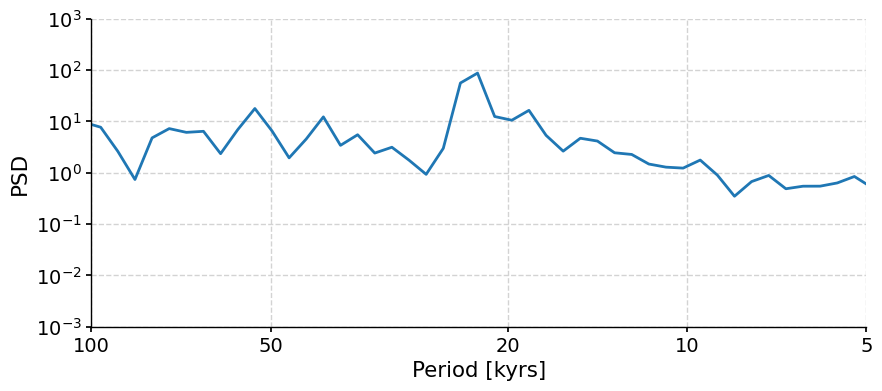

In [ ]:
#Plot WWZ results
d18O_wwz.plot()
plt.xlim([100, 5])
plt.ylim([0.001, 1000])

The dominant spectral power is at ~21,000 years. What climate forcing varies on this timescale?

This suggests a link between monsoon intensity and orbital precession! To further explore and confirm this relationship, let's take a look at insolation data and compare this to the speleothem d18O records.


##Constructing insolation curves

Speleothem records from Asia are often compared to summertime insolation. Recall that insolation is controlled by variations in Earth's orbital cycles (eccentricity, obliquity, precession), so by comparing the d18O record to insolation, we can assess the influence of orbital variations on d18O and monsoon intensity. 

To compute solar insolation, we can use the package [`climlab`](https://climlab.readthedocs.io/en/latest/index.html) by Brian Rose. Let's create a time series over the past 400,000 years of changes in summer insolation at 31.67ºN, which is the latitude of Sanbao, the cave from which the speleothem records were produced.


In [ ]:
# Specify time interval and units
kyears = np.linspace(-400, 0, 1001 ) 
# Subset of orbital parameters for specified time
orb = OrbitalTable.interp(kyear=kyears) 
days = np.linspace(0, const.days_per_year, 365)
# Generate insolation at Sanbao latitude (31.67)
Qsb = daily_insolation(31.67, days, orb)
# Julian days 152-243 are JJA 
Qsb_jja = np.mean(Qsb[:,151:243], axis=1)  

Now we can store this data as a `Series` in Pyleoclim and plot the data versus time:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='JJA Insolation [$W.m^{-2}$]'>)

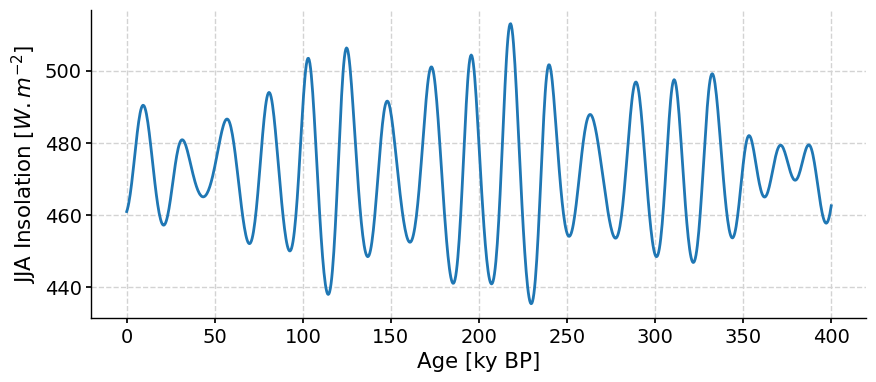

In [ ]:
ts_qsb = pyleo.Series(
    time=-kyears,
    time_name='Age',
    time_unit='ky BP',
    value=Qsb_jja,
    value_name='JJA Insolation',
    value_unit=r'$W.m^{-2}$'
)

ts_qsb.plot()

Next, let's plot and compare the speleothem d18O data and the solar insolation data:

(<Figure size 640x480 with 3 Axes>,
 {0: <Axes: ylabel='$\\delta^{18}$O [‰]'>,
  1: <Axes: ylabel='JJA Insolation [$W.m^{-2}$]'>,
  2: <Axes: xlabel='Age [kyr BP]'>})

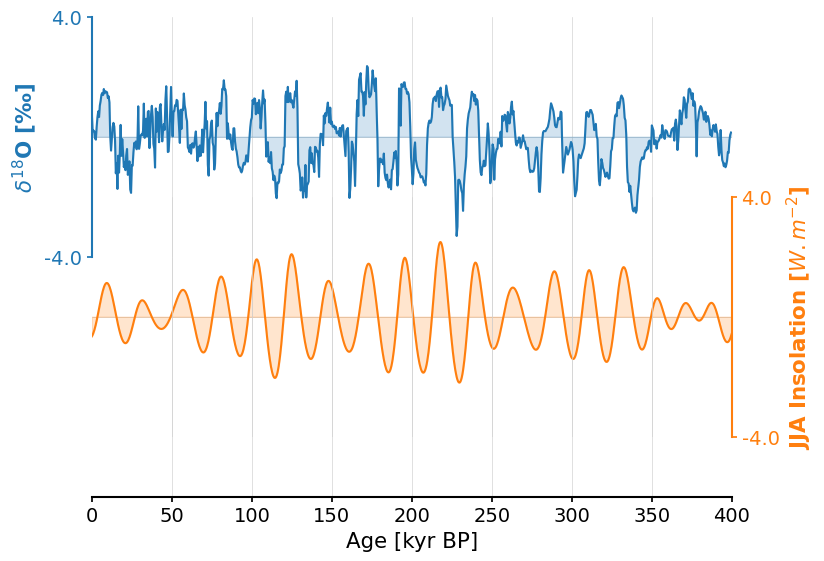

In [ ]:
#Standardize the insolation data
ts_qsb_stnd = ts_qsb.standardize()

#Create a MultipleSeries of the speleothem d18O record and insolation data
compare = [d18O_stnd, ts_qsb_stnd]
ms_compare = pyleo.MultipleSeries(compare, time_unit='kyr BP', name=None)

#Create a stackplot to compare the data
ms_compare.stackplot()

By visually comparing the time series of the two records, we can see similarites at orbital scales. To confirm this, we can use spectral analysis to determine the dominant spectral power of the insolation data:

In [ ]:
# Standardize the data
ts_qsb_stnd = ts_qsb.standardize()

In [ ]:
#Calculate the WWZ spectral analysis
psd_wwz = ts_qsb_stnd.spectral(method='wwz')

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [kyrs]', ylabel='PSD'>)

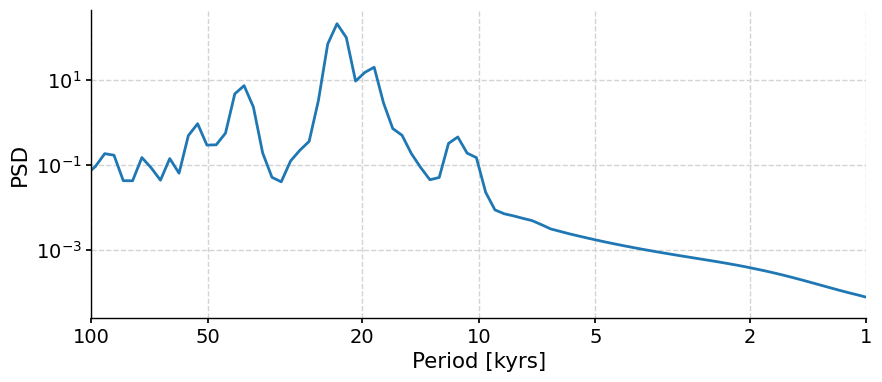

In [ ]:
psd_wwz.plot()

Consider the following questions to assess the relationship between solar insolation and monsoon intensity as recorded by the speleothem oxygen isotopes:


*   What is the dominant spectral power in summer insolation at 31ºN latitude? 
*   Is this similar to or different from the dominant spectral power observed in the speleothem d18O record?
*   What might these similarities or differences suggest about the climate forcings driving monsoon intensity in this region?
*   Why might there be a relationship between solar insolation and monsoon intensity? (*Hint: think back to what we learned on W1D1!*).





Similar to the speleothem oxygen isotopes data, the dominant spectral power in summer insolation 31ºN latitude is also ~20,000 years. This confirms the interpretation from the time series comparisons, and suggests a link between monsoon intensity and orbital precession. 